# <font color=green> Pandas

<font color=green> **The objective of this project is twofold: to delve into the study of the Pandas library while advancing further in the exploration of Jupyter Notebook and Python. The project encompasses a major dataset and offers a range of exercises involving diverse datasets.** <font>

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

4- Each dataset will have a summary of its meaning.

# About

The database in question pertains to the customer churn rate in a telecommunications company. But, after all, what is churn?

**Churn:**

Occurs when customers cease doing business with a company
- Represents a loss of revenue

- Can be an indicator of customer satisfaction with products/services.

- The term "churn" is widely used in the business world and refers to the situation where people stop doing business with a company. As data scientists, we know that churn is directly related to the company's revenue, as the more customers stop doing business, the more money the company loses.

Furthermore, churn can be used as an indicator of customer satisfaction because if many people stop doing business, it may indicate that the service offered is not meeting customer expectations.

- Strategies to reduce the churn rate
- Improve the quality of products and services
- Provide quality customer support
- Create loyalty programs

Therefore, companies seek alternatives to lower churn by offering higher-quality services, faster and better-quality support, creating loyalty programs, among other strategies.

The model we will build based on the database sent to us is intended to predict whether a particular customer will cancel the telecommunications company's service or not.

Based on this prediction, we can develop strategies to reduce churn. However, the database we received is not ready to be directly used in machine learning models. Our task is precisely to clean and process it for this purpose.

Our first dataset have this columns:

**Cliente**

- gênero: gender (masculino e feminino)
- idoso: information about whether a customer is aged 65 or older
- parceiro: whether the customer has a partner or not
- dependentes: whether the customer has dependents or not
- tempo_servico: months of the customer's contract

**Serviço de Telefonia**

- servico_telefone: subscription to telephone service
- varias_linhas: subscription to more than one phone line

**Serviço de Internet**

- servico_internet: subscription to an internet service provider
- seguranca_online: additional subscription for online security
- backup_online: additional subscription for online backup
- protecao_dispositivo: additional subscription for device protection
- suporte_tecnico: additional subscription for technical support, reduced waiting time
- tv_streaming: cable TV subscription
- filmes_streaming: movie streaming subscription

**Conta**

- contrato: type of contract
- faturamente_eletronico: whether the customer prefers to receive the bill online
- metodo_pagamento: payment method
- cobranca.mensal: total monthly charge for all customer services
- cobranca_total: total amount spent by the customer

# To Do List

1- Transform the data values into a table. Cleanse the columns, segregate information for enhanced clarity, and identify any potential issues that may impact the integrity of the dataframe.

2- Identify and handle outliers in the dataset.

3- Work with the categorical variables

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns

# Printing infos.

primary_data = pd.read_json('Dados/dataset-telecon.json')

print("Primary Data size is: {}".format(primary_data.size))
print("Primary Data type is: {}".format(type(primary_data)))

Primary Data size is: 44064
Primary Data type is: <class 'pandas.core.frame.DataFrame'>


# 1- Treating values

In [2]:
# Gathering the brute data

with open('Dados/dataset-telecon.json') as f:
    brute_data = json.load(f)
    
# Normalizing the dataframe

primary_data_normalize = pd.json_normalize(brute_data)
primary_data_normalize

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25
7342,3601-UTZXO,,masculino,0,sim,sim,41.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,transferencia bancaria (automatica),19.50,798.2


In [3]:
# Checking the infos about the dataframe

primary_data_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [4]:
# Checking the unique values of all columns

for col in primary_data_normalize.columns:
    print(f"Coluna: {col}")
    print(primary_data_normalize[col].unique())
    print("-" * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

In [5]:
# Checking the values that are empty in "conta.cobranca.Total"

primary_data_normalize[primary_data_normalize['conta.cobranca.Total'] == ' ']

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,
2308,3213-VVOLG,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.35,
2930,4075-WKNIU,nao,feminino,0,sim,sim,0.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cheque pelo correio,73.35,
3134,4367-NUYAO,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.75,
3203,4472-LVYGI,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,sim,nao,dois anos,sim,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0.0,sim,nao,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,cheque pelo correio,80.85,


In [6]:
# Checking other columns that have influence on "conta.cobranca.Total"

primary_data_normalize[primary_data_normalize['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico',
    'conta.contrato',
    'conta.cobranca.mensal',
    'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,um ano,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [7]:
# Gathering the index of this table

idx = primary_data_normalize[primary_data_normalize['conta.cobranca.Total'] == ' '].index

# Getting the 1 year contract info

idx_1year = idx[3]

# Getting the 2 years contract info

idx_2years = primary_data_normalize.iloc[list(idx[:3]) + list(idx[4:11])].index
idx_2years

Int64Index([975, 1775, 1955, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [8]:
# Setting missing values

primary_data_normalize.loc[idx_1year,'conta.cobranca.Total'] = primary_data_normalize.loc[idx_1year,'conta.cobranca.mensal'] * 12
primary_data_normalize.loc[idx_1year,'cliente.tempo_servico'] = 12

primary_data_normalize.loc[idx_2years,'conta.cobranca.Total'] = primary_data_normalize.loc[idx_2years,'conta.cobranca.mensal'] * 24
primary_data_normalize.loc[idx_2years,'cliente.tempo_servico'] = 24

In [9]:
# Transforming the column to float

primary_data_normalize['conta.cobranca.Total'] = primary_data_normalize['conta.cobranca.Total'].astype('float64')
primary_data_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [10]:
# Separating the values that are not empty on the column "Churn"

churn_values = primary_data_normalize[primary_data_normalize['Churn'] != ''].copy()
churn_values.reset_index(drop=True, inplace=True)
churn_values

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [11]:
# Removing duplicated values

churn_values.drop_duplicates(inplace=True)
churn_values.duplicated().sum()

0

In [12]:
# Checking Null Values

churn_values[churn_values.isna().any(axis=1)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


In [13]:
# Applying filter for null values of "cliente.tempo_servico"

filter_null = churn_values['cliente.tempo_servico'].isna()
filter_null

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: cliente.tempo_servico, Length: 7043, dtype: bool

In [14]:
# Checking the values that influence the column "cliente.tempo_servico"
# This columns is equals: conta.cobranca.Total / conta.cobranca.mensal

churn_values[filter_null][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [15]:
# Filling the nan values

churn_values['cliente.tempo_servico'].fillna(
    np.ceil(
        churn_values['conta.cobranca.Total'] / churn_values['conta.cobranca.mensal']
    ), inplace = True
)
churn_values[filter_null]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
9,0016-QLJIS,nao,feminino,0,sim,sim,66.0,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,13.0,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,5.0,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
751,1095-WGNGG,nao,feminino,0,sim,nao,60.0,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
3523,4994-OBRSZ,nao,masculino,0,nao,sim,14.0,sim,nao,DSL,...,sim,sim,sim,nao,sim,dois anos,nao,transferencia bancaria (automatica),76.10,1054.80
5273,7435-ZNUYY,nao,masculino,0,nao,nao,6.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cheque pelo correio,20.60,116.60
5276,7445-WMRBW,nao,feminino,0,nao,nao,49.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,um ano,sim,transferencia bancaria (automatica),73.85,3581.40
6134,8690-UPCZI,nao,masculino,0,sim,sim,29.0,sim,sim,DSL,...,nao,nao,sim,sim,nao,um ano,nao,transferencia bancaria (automatica),69.05,1958.45


In [16]:
# Checking the null values on dataframe

churn_values.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [17]:
# Checking the columns that have influence on cobranca mensal/total

null_columns = ['conta.contrato','conta.faturamente_eletronico','conta.metodo_pagamento']

churn_values[null_columns].isna().any(axis=1).sum()

37

In [18]:
# Dropping null values

primary_no_nulls = churn_values.dropna(subset=null_columns).copy()
primary_no_nulls.isna().sum()



id_cliente                       0
Churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.tempo_servico            0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamente_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.Total             0
dtype: int64

In [19]:
# Reseting index

primary_no_nulls.reset_index(drop=True, inplace=True)
primary_no_nulls

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


# 2- Outliers

<AxesSubplot: xlabel='cliente.tempo_servico'>

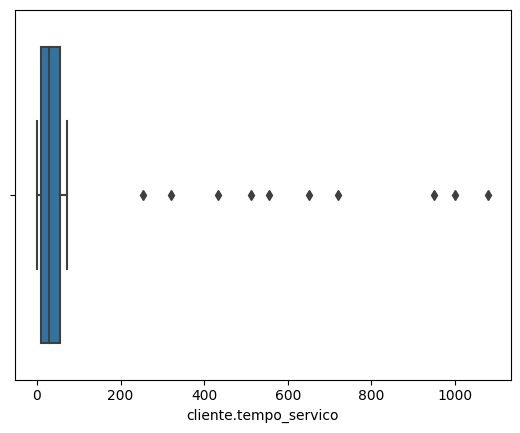

In [20]:
# Checking if "cliente.tempo.servico" column has outliers

sns.boxplot(x=primary_no_nulls['cliente.tempo_servico'])

In [21]:
# Setting variables

q1 = primary_no_nulls['cliente.tempo_servico'].quantile(.25)
q3 = primary_no_nulls['cliente.tempo_servico'].quantile(.75)
IQR = q3-q1
inferior_limit = q1 - 1.5*IQR
superior_limit = q3 + 1.5*IQR

In [22]:
# Creating series

outliers_index = (primary_no_nulls['cliente.tempo_servico'] < inferior_limit) | (primary_no_nulls['cliente.tempo_servico'] > superior_limit)
outliers_index

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente.tempo_servico, Length: 7006, dtype: bool

In [23]:
# Checking outliers

primary_no_nulls[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tempo_servico, dtype: float64

In [24]:
# making a new Dataframe

primary_no_outliers = primary_no_nulls.copy()

<AxesSubplot: xlabel='cliente.tempo_servico'>

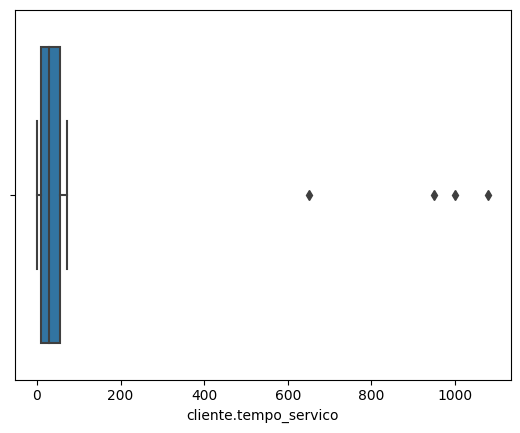

In [25]:
# Changing the values of client.tempo.servico based on conta.cobranca.Total / conta.cobranca.mensal

primary_no_outliers.loc[outliers_index, 'cliente.tempo_servico'] = np.ceil(
    primary_no_nulls.loc[outliers_index, 'conta.cobranca.Total'] /
    primary_no_nulls.loc[outliers_index, 'conta.cobranca.mensal']
)

# Checking if still has outliers

sns.boxplot(x=primary_no_outliers['cliente.tempo_servico'])

In [26]:
# We still have outliers that we couldn't transform, we need to remove them since we don't have enought information to save it

primary_no_outliers[outliers_index][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


In [27]:
# Applying filter again with new dataframe

q1 = primary_no_outliers['cliente.tempo_servico'].quantile(.25)
q3 = primary_no_outliers['cliente.tempo_servico'].quantile(.75)
IQR = q3-q1
inferior_limit = q1 - 1.5*IQR
superior_limit = q3 + 1.5*IQR

outliers_index = (primary_no_outliers['cliente.tempo_servico'] < inferior_limit) | (primary_no_outliers['cliente.tempo_servico'] > superior_limit)
primary_no_outliers[outliers_index]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.9,112212.0
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.9,45900.0
1952,2834-SPCJV,sim,masculino,0,sim,nao,951.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.1,79895.0
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.0,47450.0


<AxesSubplot: xlabel='cliente.tempo_servico'>

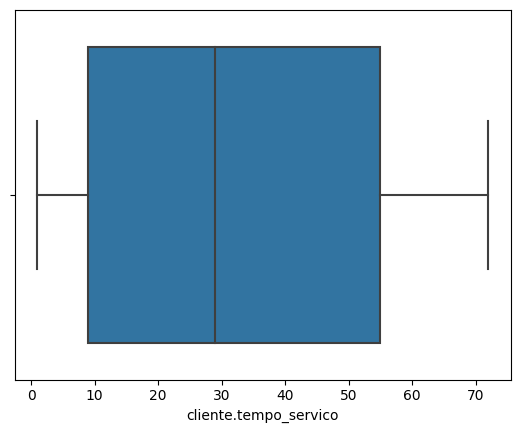

In [28]:
# Removing those outliers

primary_no_outliers = primary_no_outliers[~outliers_index]
primary_no_outliers.reset_index(inplace=True, drop=True)
sns.boxplot(x = primary_no_outliers['cliente.tempo_servico'])

# 3- Working with Categorical Variables

In [29]:
# Remove the ID column, since it doesn't have any use for us

primary_no_id = primary_no_outliers.drop('id_cliente', axis=1).copy()
primary_no_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [30]:
# Replacing the valeus of "nao","sim" - "masculino","feminino" to 0 and 1 to better use of ML

mapping = {
    'nao': 0,
    'sim':1,
    'masculino': 0,
    'feminino':1
}

columns = ['telefone.servico_telefone', 'Churn', 'cliente.parceiro', 'cliente.dependentes', 'conta.faturamente_eletronico', 'cliente.genero']

primary_no_id[columns] = primary_no_id[columns].replace(mapping)

for col in primary_no_id.columns:
    print(f"Columns: {col}")
    print(primary_no_id[col].unique())
    print("-" * 30)

Columns: Churn
[0 1]
------------------------------
Columns: cliente.genero
[0 1]
------------------------------
Columns: cliente.idoso
[0 1]
------------------------------
Columns: cliente.parceiro
[0 1]
------------------------------
Columns: cliente.dependentes
[0 1]
------------------------------
Columns: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Columns: telefone.servico_telefone
[1 0]
------------------------------
Columns: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Columns: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Columns: internet.seguranca_online
['nao' 'sim' 'sem servico de internet']

In [31]:
# Applying dummies to the ones that we couldn't change.

primary_dummy = pd.get_dummies(primary_no_id, dtype='int64').copy()
primary_dummy

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.90,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,4.0,1,1,73.90,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.00,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.90,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,9.0,1,1,69.40,571.45,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,0,55.15,742.90,...,1,0,0,0,0,1,0,0,1,0
6998,1,0,0,1,0,22.0,1,1,85.10,1873.70,...,0,0,1,0,1,0,0,1,0,0
6999,0,0,0,0,0,2.0,1,1,50.30,92.75,...,1,0,0,0,1,0,0,0,1,0
7000,0,0,0,1,1,67.0,1,0,67.85,4627.65,...,0,0,1,1,0,0,0,0,1,0


In [32]:
# Checking the columns type

primary_dummy.info()

# We now can deliver the dataframe to the ML team.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Churn                                                       7002 non-null   int64  
 1   cliente.genero                                              7002 non-null   int64  
 2   cliente.idoso                                               7002 non-null   int64  
 3   cliente.parceiro                                            7002 non-null   int64  
 4   cliente.dependentes                                         7002 non-null   int64  
 5   cliente.tempo_servico                                       7002 non-null   float64
 6   telefone.servico_telefone                                   7002 non-null   int64  
 7   conta.faturamente_eletronico                                7002 non-null   int64  
 8 

------------------------------

# Exercises


1- You have been tasked with normalizing the following JSON file named "informacoes.json," which contains some customer identification information.

2- Your task is to perform some treatments and convert this JSON file into a Pandas DataFrame, ensuring there are no empty values and that the column types are correct. How can this be accomplished?

3- To facilitate the analysis of registration data for courses on a platform, you've received a file named "cursos_cadastrados.json." It has been communicated that these data may contain issues that could hinder accurate analysis and interpretation. The objectives of this exercise are to:

Identify and Remove Null Values:

- Locate and address samples with missing values in certain columns that need to be filled for accurate analysis.

Handle Duplicates:

- Identify and eliminate identical records that might disrupt data analysis, as they represent redundant information.
Address Empty Strings:

- Locate and handle text values that contain no written content, which could complicate data analysis, especially if a column has numerous such values.

Type Conversion:

- Identify columns with incorrect data types, such as text instead of numbers, and perform the necessary conversion for each column to ensure accurate analysis.

Within this context, a systematic approach is required to clean the data effectively. How can this be accomplished?

4- Your mission is to build a function that receives two parameters: the column you want to analyze for outliers and the DataFrame in question. The intention of doing this is to reuse this function for other columns and other DataFrames in future analyses. The method that should be implemented for outlier identification is the interquartile range.

new dataframe:

df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
                           
})

In [33]:
# 1)

with open ('Dados/informacoes.json') as j:
    bruto = json.load(j)
    
information = pd.json_normalize(bruto, record_path= 'enderecos', sep = ',', meta=['nome','idade'])
information

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,SÃ£o Paulo,JoÃ£o,28
1,trabalho,Rua B,456,Rio de Janeiro,JoÃ£o,28


In [34]:
# 2)

with open ('Dados/dados.json') as j:
    bruto = json.load(j)

information_ex2 = pd.json_normalize(bruto, record_path=['pessoas'])

for col in information_ex2.columns:
    print(f"Column: {col}")
    
    if any(isinstance(value, list) for value in information_ex2[col]):
        unique_values = set(value for sublist in information_ex2[col] for value in sublist)
    else:
        unique_values = information_ex2[col].unique()

    print(unique_values)
    print("-" * 30)

Column: nome
['JoÃ£o' 'Maria']
------------------------------
Column: idade
['25' 30]
------------------------------
Column: telefones
{'11 1111-1111', '21 3333-3333', '11 2222-2222'}
------------------------------
Column: endereco.rua
['Rua A' '']
------------------------------
Column: endereco.numero
[123 456]
------------------------------
Column: endereco.cidade
['SÃ£o Paulo' 'Rio de Janeiro']
------------------------------


In [35]:
information_ex2['idade'] = information_ex2['idade'].astype('int64')


information_ex2 = information_ex2[information_ex2['endereco.rua'] != ""]

In [36]:
information_ex2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             1 non-null      object
 1   idade            1 non-null      int64 
 2   telefones        1 non-null      object
 3   endereco.rua     1 non-null      object
 4   endereco.numero  1 non-null      int64 
 5   endereco.cidade  1 non-null      object
dtypes: int64(2), object(4)
memory usage: 56.0+ bytes


In [37]:
# 3) 

with open ('Dados/cursos_cadastrados.json', encoding='utf-8') as j:
    data = json.load(j)
    
information_ex3 = pd.json_normalize(data)
information_ex3

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [38]:
information_ex3.drop_duplicates(inplace=True)
information_ex3.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [39]:
information_ex3.replace('', pd.NA, inplace=True)
information_ex3

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,<NA>,2022-04-01,<NA>,Curso avançado sobre inteligência artificial c...,129.9,<NA>,contato@emailaleatorio.com,<NA>
4,Inglês para negócios,Idiomas,20 horas,30,<NA>,<NA>,Curso de inglês para negócios,69.9,John Smith,<NA>,<NA>


In [40]:
information_ex3.dropna(inplace=True)
information_ex3.isna().sum().sum()

0

In [41]:
information_ex3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      object
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


In [42]:
information_ex3['concluintes'] = information_ex3['concluintes'].astype('int64')
information_ex3['preco'] = information_ex3['preco'].astype('float64')

information_ex3['data_inicio'] = pd.to_datetime(information_ex3['data_inicio'])
information_ex3['data_conclusao'] = pd.to_datetime(information_ex3['data_conclusao'])

information_ex3['carga_horaria'] = information_ex3['carga_horaria'].str.replace('horas', '')
information_ex3['carga_horaria'] = information_ex3['carga_horaria'].astype('int64')

In [43]:
information_ex3

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.9,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [44]:
# 4)

df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
                           
})

In [45]:
for col in df.columns:
    print(f"Column: {col}")
    
    if any(isinstance(value, list) for value in df[col]):
        unique_values = set(value for sublist in df[col] for value in sublist)
    else:
        unique_values = df[col].unique()

    print(unique_values)
    print("-" * 30)

print(df.info())

Column: ID da transação
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
------------------------------
Column: Valor da transação
[100 200 150 500 300 913 250 400 301 805 600 350 800]
------------------------------
Column: Data da transação
['2022-01-01T00:00:00.000000000' '2022-01-02T00:00:00.000000000'
 '2022-01-03T00:00:00.000000000' '2022-01-04T00:00:00.000000000'
 '2022-01-05T00:00:00.000000000' '2022-01-06T00:00:00.000000000'
 '2022-01-07T00:00:00.000000000' '2022-01-08T00:00:00.000000000'
 '2022-01-09T00:00:00.000000000' '2022-01-10T00:00:00.000000000'
 '2022-01-11T00:00:00.000000000' '2022-01-12T00:00:00.000000000'
 '2022-01-13T00:00:00.000000000' '2022-01-14T00:00:00.000000000'
 '2022-01-15T00:00:00.000000000' '2022-01-16T00:00:00.000000000'
 '2022-01-17T00:00:00.000000000' '2022-01-18T00:00:00.000000000'
 '2022-01-19T00:00:00.000000000' '2022-01-20T00:00:00.000000000'
 '2022-01-21T00:00:00.000000000' '2022-01-22T00:00:00.000000000'

In [46]:
def df_outliers(column, dataframe):
    
    
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    IQR = q3-q1
    inferior_limit = q1 - 1.5*IQR
    superior_limit = q3 + 1.5*IQR
    
    outliers = dataframe[(dataframe[column] < inferior_limit) | (dataframe[column] > superior_limit)]
    
    return outliers

In [47]:
df_outliers('Valor da transação', df)

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"
